In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Asteroid_Updated.csv")
data

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.594780,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.233240,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.034540,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.139480,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.095890,MBA,0.238632,1508.600458,282.366289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839709,NaN,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,...,NaN,NaN,NaN,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,NaN,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,...,NaN,NaN,NaN,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,NaN,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,...,NaN,NaN,NaN,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,NaN,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,...,NaN,NaN,NaN,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134


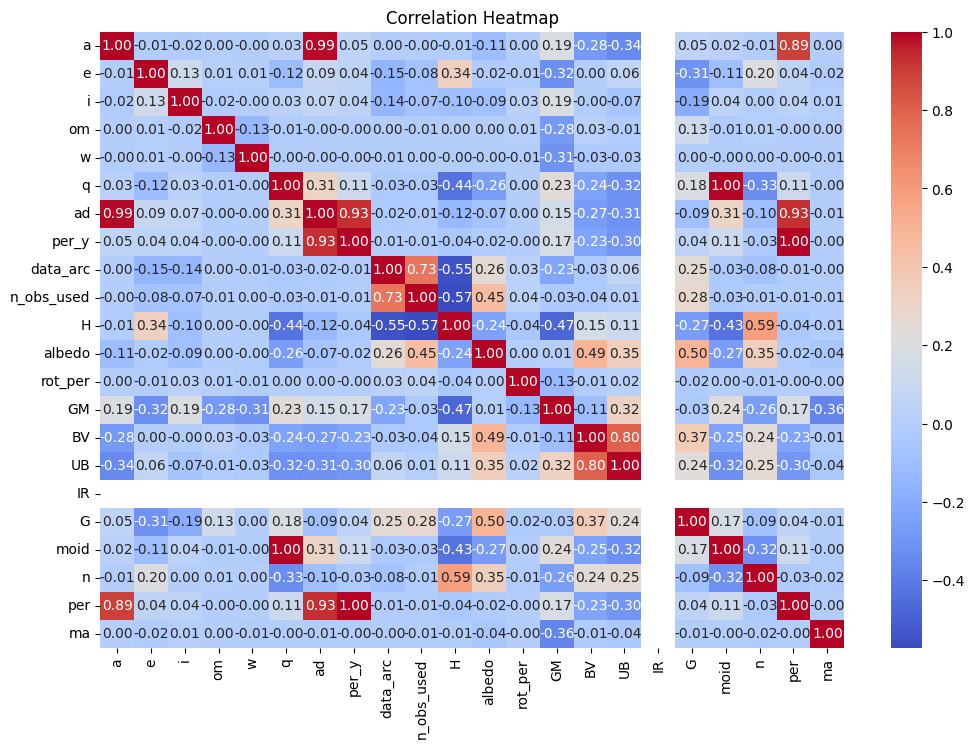

In [3]:
# Plot heatmap
numeric_data = data.select_dtypes(include=[np.number])

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

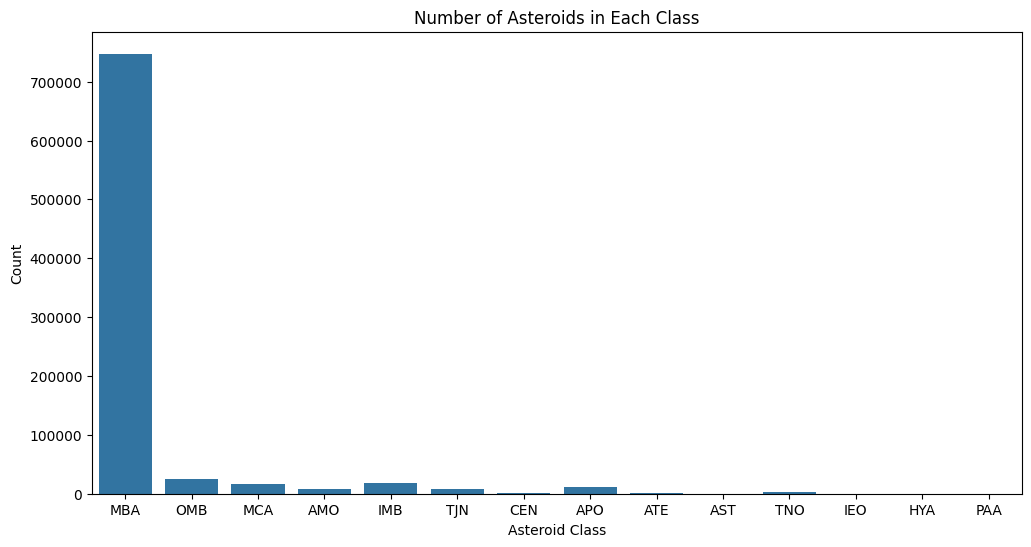

In [4]:
# Plot factor plot
plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=data)
plt.title("Number of Asteroids in Each Class")
plt.xlabel("Asteroid Class")
plt.ylabel("Count")
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [6]:
data = data.drop(columns=['name'])
data_sample = data.sample(n=10000, random_state=42)
data_sample

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
10915,2.886725,0.024609,0.941499,305.739193,317.913991,2.815687,2.957763,4.904743,15672.0,0,...,NaN,NaN,NaN,NaN,NaN,1.79953,MBA,0.200954,1791.457306,346.115230
525194,3.127036,0.170076,26.558403,39.105115,272.566489,2.595201,3.658871,5.529775,5370.0,0,...,NaN,NaN,NaN,NaN,NaN,1.74635,MBA,0.178240,2019.750229,291.479565
294282,2.405329,0.051591,3.407434,42.854786,144.191352,2.281235,2.529423,3.730524,5990.0,0,...,NaN,NaN,NaN,NaN,NaN,1.28266,MBA,0.264206,1362.574045,241.913283
709059,2.379101,0.057795,10.984721,300.313366,313.776277,2.241599,2.516602,3.669673,59.0,4,...,NaN,NaN,NaN,NaN,NaN,1.23828,MBA,0.268587,1340.348148,159.781485
667097,2.970821,0.149538,5.939196,309.085101,62.914581,2.526570,3.415072,5.120624,2305.0,2.0,...,NaN,NaN,NaN,NaN,NaN,1.53241,MBA,0.192482,1870.307945,94.054674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750140,3.007998,0.122530,11.033153,44.508268,282.339958,2.639428,3.376569,5.217045,977.0,5,...,NaN,NaN,NaN,NaN,NaN,1.65588,MBA,0.188924,1905.525660,166.378190
606921,2.723414,0.162870,4.938555,9.181125,40.937759,2.279852,3.166975,4.494471,3357.0,0.0,...,NaN,NaN,NaN,NaN,NaN,1.29229,MBA,0.219297,1641.605669,115.566824
702569,3.159993,0.056506,11.467162,19.995485,296.565736,2.981433,3.338552,5.617425,14.0,7,...,NaN,NaN,NaN,NaN,NaN,1.99083,MBA,0.175459,2051.764548,188.344343
744567,3.136267,0.135372,13.687633,350.167284,183.715654,2.711703,3.560831,5.554280,3020.0,1,...,NaN,NaN,NaN,NaN,NaN,1.71768,MBA,0.177453,2028.700873,265.364851


In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col] = data[col].astype(str)

# Encode categorical variables
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(data)

# Assuming 'diameter' is your target variable
y = data['diameter']

# Split the imputed dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

In [8]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
r2_scores_lr= r2_score(y_test, y_pred_lr)
mse_scores_lr = mean_squared_error(y_test, y_pred_lr)
mae_scores_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_scores_lr = np.sqrt(mse_scores_lr)

print("R2 Scores:", r2_scores_lr)
print("Mean Squared Error :", mse_scores_lr)
print("Mean Absolute Error :", mae_scores_lr)
print("Root Mean Squared Error :", rmse_scores_lr)

R2 Scores: 1.0
Mean Squared Error : 3.383600193475742e-22
Mean Absolute Error : 1.140657790657998e-11
Root Mean Squared Error : 1.8394564940426674e-11


In [9]:
ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred_ridge = ridge.predict(X_test)
r2_scores_ridge= r2_score(y_test, y_pred_ridge)
mse_scores_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_scores_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_scores_ridge = np.sqrt(mse_scores_ridge)

print("R2 Scores:", r2_scores_ridge)
print("Mean Squared Error :", mse_scores_ridge)
print("Mean Absolute Error :", mae_scores_ridge)
print("Root Mean Squared Error :", rmse_scores_ridge)

R2 Scores: 1.0
Mean Squared Error : 6.410948436866556e-20
Mean Absolute Error : 1.4232547126500878e-10
Root Mean Squared Error : 2.531985078326204e-10


In [10]:
ElasticNet = ElasticNet()
ElasticNet.fit(X_train,y_train)
y_pred_elastic = ElasticNet.predict(X_test)
r2_scores_elastic= r2_score(y_test, y_pred_elastic)
mse_scores_elastic = mean_squared_error(y_test, y_pred_elastic)
mae_scores_elastic = mean_absolute_error(y_test, y_pred_elastic)
rmse_scores_elastic = np.sqrt(mse_scores_elastic)

print("R2 Scores:", r2_scores_elastic)
print("Mean Squared Error :", mse_scores_elastic)
print("Mean Absolute Error :", mae_scores_elastic)
print("Root Mean Squared Error :", rmse_scores_elastic)

R2 Scores: 0.9999999999999933
Mean Squared Error : 7.915876861296734e-08
Mean Absolute Error : 0.00018435029930232165
Root Mean Squared Error : 0.0002813516813757603


In [11]:
DecisionTree = DecisionTreeRegressor()
DecisionTree.fit(X_train,y_train)
y_pred_decision = DecisionTree.predict(X_test)
r2_scores_decision= r2_score(y_test, y_pred_decision)
mse_scores_decision = mean_squared_error(y_test, y_pred_decision)
mae_scores_decision = mean_absolute_error(y_test, y_pred_decision)
rmse_scores_decision = np.sqrt(mse_scores_decision)

print("R2 Scores:", r2_scores_decision)
print("Mean Squared Error :", mse_scores_decision)
print("Mean Absolute Error :", mae_scores_decision)
print("Root Mean Squared Error :", rmse_scores_decision)

R2 Scores: 0.9999999944652235
Mean Squared Error : 0.06563536437958117
Mean Absolute Error : 0.02634822529072364
Root Mean Squared Error : 0.25619399754791516


In [12]:
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,y_train)
y_pred_forest = RandomForest.predict(X_test)
r2_scores_forest= r2_score(y_test, y_pred_forest)
mse_scores_forest = mean_squared_error(y_test, y_pred_forest)
mae_scores_forest = mean_absolute_error(y_test, y_pred_forest)
rmse_scores_forest = np.sqrt(mse_scores_forest)

print("R2 Scores:", r2_scores_forest)
print("Mean Squared Error :", mse_scores_forest)
print("Mean Absolute Error :", mae_scores_forest)
print("Root Mean Squared Error :", rmse_scores_forest)

R2 Scores: 0.9999999989780523
Mean Squared Error : 0.012118991562613899
Mean Absolute Error : 0.013721322115248041
Root Mean Squared Error : 0.11008629143818907


In [13]:
XGBoost = XGBRegressor()
XGBoost.fit(X_train,y_train)
y_pred_xg = XGBoost.predict(X_test)
r2_scores_xg = r2_score(y_test, y_pred_xg)
mse_scores_xg = mean_squared_error(y_test, y_pred_xg)
mae_scores_xg = mean_absolute_error(y_test, y_pred_xg)
rmse_scores_xg = np.sqrt(mse_scores_xg)

print("R2 Scores:", r2_scores_xg)
print("Mean Squared Error :", mse_scores_xg)
print("Mean Absolute Error :", mae_scores_xg)
print("Root Mean Squared Error :", rmse_scores_xg)

R2 Scores: 0.9999844326642062
Mean Squared Error : 184.60867388212924
Mean Absolute Error : 2.810344760177153
Root Mean Squared Error : 13.58707745919369


In [14]:
from tabulate import tabulate

models = ['Linear Regression', 'Ridge Regression', 'Elastic Net', 'Decision Tree', 'Random Forest', 'XG Boost']
r2_scores = [r2_scores_lr, r2_scores_ridge, r2_scores_elastic, r2_scores_decision, r2_scores_forest, r2_scores_xg]
mse_values = [mse_scores_lr, mse_scores_ridge, mse_scores_elastic, mse_scores_decision, mse_scores_forest, mse_scores_xg]
mae_values = [mae_scores_lr, mae_scores_ridge, mae_scores_elastic, mae_scores_decision, mae_scores_forest, mae_scores_xg]
rmse_values = [rmse_scores_lr, rmse_scores_ridge, rmse_scores_elastic, rmse_scores_decision, rmse_scores_forest, rmse_scores_xg]


results = [
    [model, r2, mse, mae, rmse] 
    for model, r2, mse, mae, rmse 
    in zip(models, r2_scores, mse_values, mae_values, rmse_values)
]

print(tabulate(results, headers=['Models', 'R2 Score', 'Mean Squared Error (MSE)', 'Mean Absolute Error (MAE)', 'Root Mean Squared Error (RMSE)'], tablefmt='orgtbl'))

| Models            |   R2 Score |   Mean Squared Error (MSE) |   Mean Absolute Error (MAE) |   Root Mean Squared Error (RMSE) |
|-------------------+------------+----------------------------+-----------------------------+----------------------------------|
| Linear Regression |   1        |                3.3836e-22  |                 1.14066e-11 |                      1.83946e-11 |
| Ridge Regression  |   1        |                6.41095e-20 |                 1.42325e-10 |                      2.53199e-10 |
| Elastic Net       |   1        |                7.91588e-08 |                 0.00018435  |                      0.000281352 |
| Decision Tree     |   1        |                0.0656354   |                 0.0263482   |                      0.256194    |
| Random Forest     |   1        |                0.012119    |                 0.0137213   |                      0.110086    |
| XG Boost          |   0.999984 |              184.609       |                 2.81034     |    

In [ ]:
print("Project over.")